In [1]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pdb
warnings.filterwarnings('ignore')

In [2]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

In [3]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

In [12]:
# ----- DICE UP DATA -----

assays = ['introduction','reunion','aggression','timedMating']
behavior = ['Huddle']
GT = ['WT']
sex = ['M']

# filtering indices -- makes a list of true/false values for each data entry about whether it matches the criterion
assayIdx = data.assay.isin(assays)
behaviorIdx = data.behavior.isin(behavior)
gtIdx = data.GT.isin(GT)
sexIdx = data.sex.isin(sex)

idx1 = np.logical_and(assayIdx,behaviorIdx)
idx2 = np.logical_and(gtIdx,sexIdx)
allIdx = np.logical_and(idx1,idx2)

# filtered data
wtmdf = data[allIdx]

In [13]:
wtmdf.head()

,Unnamed: 0,id,start_time,stop_time,behavior,duration,atype,pair_tag,sex,GT,color,assay,pair_num
7402,7402,25,39.744,39.992,Huddle,0.248,STATE,Pair18,M,WT,[ 89. 91. 125.],aggression,0
7407,7407,30,50.493,51.744,Huddle,1.251,STATE,Pair18,M,WT,[ 89. 91. 125.],aggression,0
7409,7409,32,51.993,54.423,Huddle,2.430,STATE,Pair18,M,WT,[ 89. 91. 125.],aggression,0
7416,7416,39,59.160,60.160,Huddle,1.000,STATE,Pair18,M,WT,[ 89. 91. 125.],aggression,0
7438,7438,61,78.581,80.492,Huddle,1.911,STATE,Pair18,M,WT,[ 89. 91. 125.],aggression,0


<AxesSubplot: xlabel='duration', ylabel='Count'>

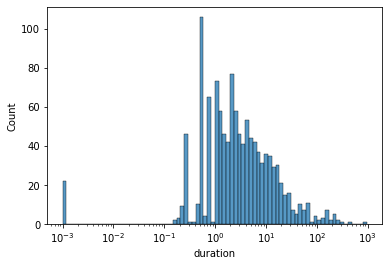

In [27]:
sns.histplot(data=wtmdf,x='duration',bins=80,log_scale=(10,False))